# IDS Assignment 1
Document your results as well as the way you obtained them in this jupyter notebook. A seperate report (pdf, word etc.) is _not_ required. However, it is necessary that you provide the python code leading to your results as well as textual answers to the assignment questions in this notebook. 

Do not change the general structure of this notebook, but you can add further markdown or code cells to explain your solutions if necessary. In the end, submit this file in moodle.

## Get to know the data

### Question 1 (Indicating type): 
1. Identify precise type of each attribute. Note that the right answers are like: “numerical-continuous-ratio”, just Numerical or Categorical is not enough.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

sns.set_palette("deep")
mpl.rcParams['axes.axisbelow'] = True
mpl.rcParams['grid.color'] = '0.7'
mpl.rcParams['figure.figsize'] = '14, 7'

In [2]:
data = pd.read_csv('adult.data-3.csv')
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,label
0,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
2,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,16,Jamaica,<=50K
3,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,>50K
4,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,50,United-States,>50K


In [3]:
data.dtypes

age                int64
workclass         object
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
hours-per-week     int64
native-country    object
label             object
dtype: object

Explanation:

|attribute|type|
|---|----|
|age|numerical-discrete|
|workclass|categorical-nominal|
|education|categorical-ordinal|
|education-num|numerical-discrete|
|marital-status|categorical-nominal|
|occupation|categorical-nominal|
|relationship|categorical-nominal|
|race|categorical-nominal|
|sex|categorical-nominal|
|hours-per-week|numerical-discrete|
|native-country|categorical-nominal|

### Question 2 (Removing outliers):
2. (a) Explore into "age" and "hours-per-week" and identify outliers (Boxplot returns whiskers). After identifying outliers, remove them (do it just once on the data set). Now you should have two data sets (cleaned and original).

In [4]:
# your code
print('age:\n--------------------')
print(data['age'].describe())
print('Number of missing values: ', data['age'].isna().sum())
print('Number of unique values: ', data['age'].nunique())

print('\nhours-per-week:\n--------------------')
print(data['hours-per-week'].describe())
print('Number of missing values: ', data['hours-per-week'].isna().sum())
print('Number of unique values: ', data['hours-per-week'].nunique())

age:
--------------------
count    17841.000000
mean        40.102965
std         13.156900
min         17.000000
25%         30.000000
50%         39.000000
75%         49.000000
max         90.000000
Name: age, dtype: float64
Number of missing values:  0
Number of unique values:  70

hours-per-week:
--------------------
count    17841.000000
mean        41.748332
std         12.207203
min          1.000000
25%         40.000000
50%         40.000000
75%         48.000000
max         99.000000
Name: hours-per-week, dtype: float64
Number of missing values:  0
Number of unique values:  92


#### Distribution of age

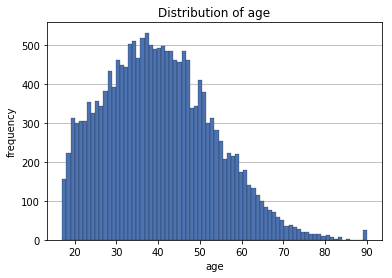

In [5]:
fig, ax = plt.subplots()
number_of_bins = data['age'].max() - data['age'].min() + 1
ax.hist(data['age'], number_of_bins, edgecolor='black', linewidth=0.2)
ax.set_title('Distribution of age')
ax.set_xlabel('age')
ax.set_ylabel('frequency')
ax.grid(axis='y')
plt.show()

#### Distribution of hours-per-week

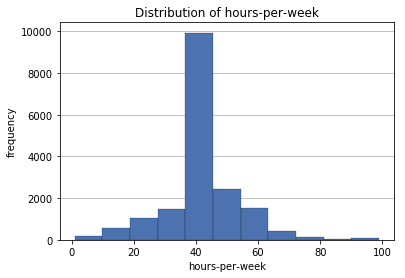

In [6]:
fig, ax = plt.subplots()
number_of_bins = 11
ax.hist(data['hours-per-week'], number_of_bins, edgecolor='black', linewidth=0.2)
ax.set_title('Distribution of hours-per-week')
ax.set_xlabel('hours-per-week')
ax.set_ylabel('frequency')
ax.grid(axis='y')
plt.show()

In [7]:
IQR_age = data['age'].quantile(0.75) - data['age'].quantile(0.25)
upper_fence_age = data['age'].quantile(0.75) + 1.5 * IQR_age
lower_fence_age = data['age'].quantile(0.25) - 1.5 * IQR_age

IQR_hours_per_week = data['hours-per-week'].quantile(0.75) - data['hours-per-week'].quantile(0.25)
upper_fence_hours_per_week = data['hours-per-week'].quantile(0.75) + 1.5 * IQR_hours_per_week
lower_fence_hours_per_week = data['hours-per-week'].quantile(0.25) - 1.5 * IQR_hours_per_week

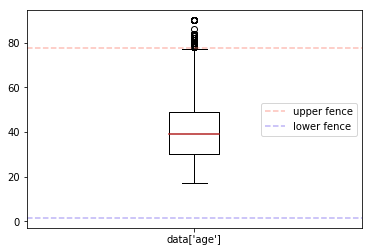

In [8]:
medianprops = dict(linestyle='-', linewidth=1.5, color='firebrick') # properties for median line in boxplot

fig, ax = plt.subplots()
ax.boxplot(data['age'], medianprops=medianprops, labels=['data[\'age\']'])
ax.axhline(y=upper_fence_age, alpha=0.5, label='upper fence', linestyle='--', color='salmon')
ax.axhline(y=lower_fence_age, alpha=0.5, label='lower fence', linestyle='--', color='mediumslateblue')
ax.legend()
plt.show()

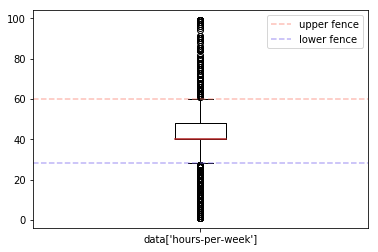

In [9]:
fig, ax = plt.subplots()
ax.boxplot(data['hours-per-week'], medianprops=medianprops, labels=['data[\'hours-per-week\']'])
ax.axhline(y=upper_fence_hours_per_week, alpha=0.5, label='upper fence', linestyle='--', color='salmon')
ax.axhline(y=lower_fence_hours_per_week, alpha=0.5, label='lower fence', linestyle='--', color='mediumslateblue')
ax.legend()
plt.show()

In [10]:
data_clean = data[(data['age'] <= upper_fence_age) &
                  (data['age'] >= lower_fence_age) &
                  (data['hours-per-week'] <= upper_fence_hours_per_week) &
                  (data['hours-per-week'] >= lower_fence_hours_per_week)]

2. (b) Draw Boxplot of the cleaned data set for "hours-per-week". Is there still any outlier? If so, explain why?

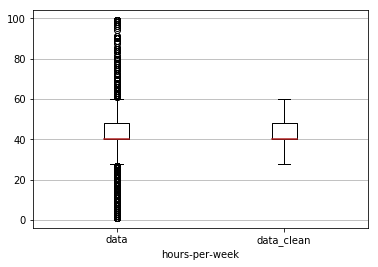

In [11]:
# your code
fig, ax = plt.subplots()
ax.boxplot([data['hours-per-week'], data_clean['hours-per-week']], labels=['data', 'data_clean'], medianprops=medianprops)
ax.grid(axis='y')
ax.set_xlabel('hours-per-week')
plt.show()

In [12]:
data['hours-per-week'].describe()

count    17841.000000
mean        41.748332
std         12.207203
min          1.000000
25%         40.000000
50%         40.000000
75%         48.000000
max         99.000000
Name: hours-per-week, dtype: float64

In [13]:
data_clean['hours-per-week'].describe()

count    15311.000000
mean        43.060153
std          6.872676
min         28.000000
25%         40.000000
50%         40.000000
75%         48.000000
max         60.000000
Name: hours-per-week, dtype: float64

Explanation: Sometimes after removing outliers with the boxplot method there are still outliers if you visualize the data again as a box plot. Because after removing the outliers it could be very well the case that the new data set has different quartiles and therefore different upper and lower fences.

**Here** it is not the case: after removing the outliers of the original data set there aren't any outliers for "hours-per-week" in the cleaned data set.

### Question 3 (Basic visualization):
3. (a) Visualize mean and median of "age", and "hours-per-week" per "sex" by separate plots for the cleaned and the original data sets (there should be 8 plots, 4 plots for the original data set and 4 plots for the cleaned data set). 

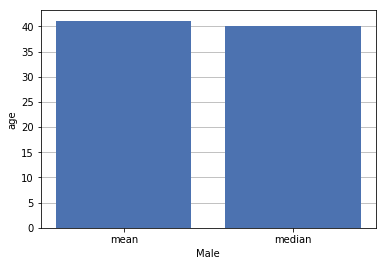

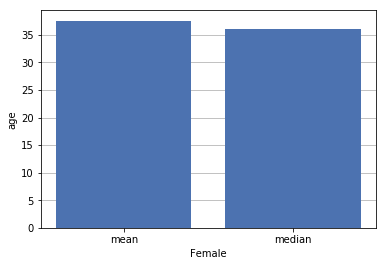

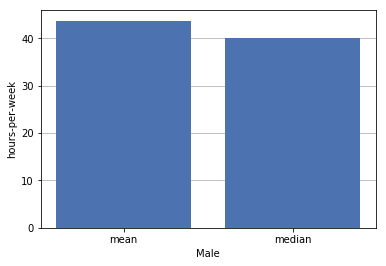

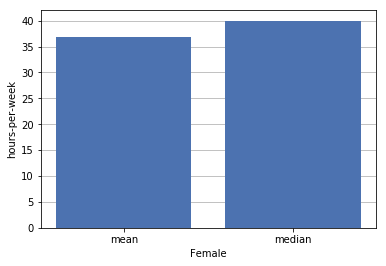

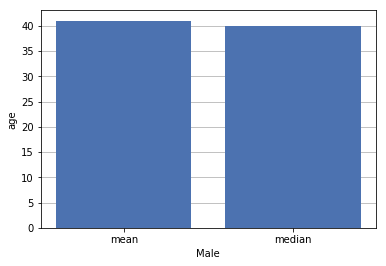

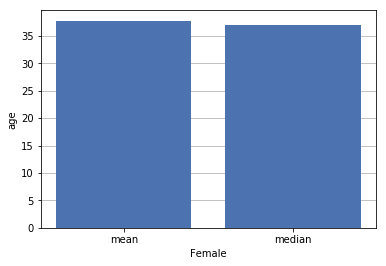

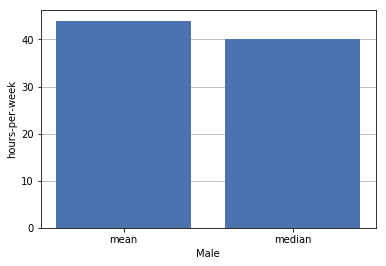

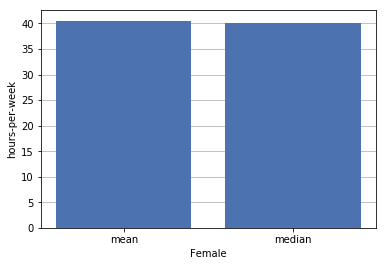

In [14]:
functions = ['mean', 'median']
#data.name = 'Original data set'
#data_clean.name = 'Clean data set'

for df in [data, data_clean]:
    for attribute in ['age', 'hours-per-week']:
        for sex in ['Male', 'Female']:
            mean_median = df.loc[df['sex'] == sex, attribute].agg(functions).values
            fig, ax = plt.subplots()
            ax.bar(x=functions, height=mean_median)
            #ax.set_title('df')
            ax.set_xlabel(sex)
            ax.set_ylabel(attribute)
            ax.grid(axis='y')
            plt.show()   

In [15]:
data.loc[data['sex'] == 'Male', 'age'].agg(functions)

mean      41.121176
median    40.000000
Name: age, dtype: float64

In [16]:
data.loc[data['sex'] == 'Female', 'age'].agg(functions)

mean      37.575917
median    36.000000
Name: age, dtype: float64

In [17]:
data_clean.loc[data_clean['sex'] == 'Male', 'age'].agg(functions)

mean      40.998311
median    40.000000
Name: age, dtype: float64

In [18]:
data_clean.loc[data_clean['sex'] == 'Female', 'age'].agg(functions)

mean      37.772694
median    37.000000
Name: age, dtype: float64

3. (b) Explain how mean and median of "age" per "sex" change when you remove the outliers.

Explanation: Looking at the plots we can see that by removing the outliers the median of the age for males doesn't change at all, while the median of the age for females goes up by 1 (from 36 to 37). The mean of the age for both males and females changes only marginally.

### Question 4 (Distribution):
4. (a) Explore into distribution of "age" in the original data set. Does it have any well-known distribution (normal, uniform, skewed, ...)? If so, what are the main statistical features (mean, median, and mode) of this specific type of distribution.

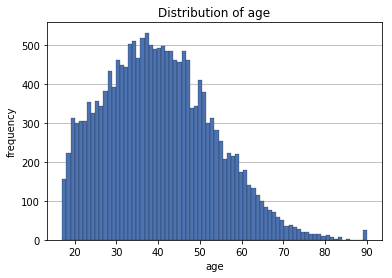

In [19]:
# your code
fig, ax = plt.subplots()
number_of_bins = data['age'].max() - data['age'].min() + 1
ax.hist(data['age'], number_of_bins, edgecolor='black', linewidth=0.2)
ax.set_title('Distribution of age')
ax.set_xlabel('age')
ax.set_ylabel('frequency')
ax.grid(axis='y')
plt.show()

In [20]:
print(data['age'].mean())
print(data['age'].median())
print(data['age'].mode().values)

40.10296508043271
39.0
[37]


Explanation: The distribution of the attribute "age" is unimodal (skewed right). The mean is 40.1, the median is 39 and the most frequent value (mode) is 37.

4. (b) Explore into distribution of "age" and "hours-per-week" together. Explain how the data is distributed with respect to these two attributes in the original data sets (using Jointplot)?


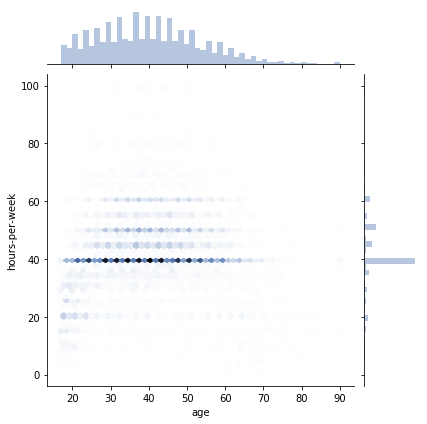

In [21]:
# your code
#sns.jointplot(x='age', y='hours-per-week', data=data, kind="kde")  #kind = scatter, hex, reg,kde 
#plt.show()

sns.jointplot(x='age', y='hours-per-week', data=data, kind="hex")  #kind = scatter, hex, reg,kde 
plt.show()

Explanation: Because most people have a 40-hour-job the data is distributed around the 40 hours. You can also see the 20 hours mark (half-time jobs).

But you can see no correlation between these two attributes. The Pearson correlation coefficient is also around 0. Maybe you can see that rather younger people have half-time jobs (20 hours), but other than that you can not say much about the relationship between age and hours per week.

## Building models to perform predictions

### Question 5 (Decision Tree):
5. (a) Consider all the categorical attributes except label as descriptive features and label (income) as target feature. Make two decision trees (one based on Entropy and another based on Gini).

In [22]:
# your code
from DecisionTree import DecisionTree

attributes = ['workclass', 'education', 'marital-status', 'occupation',
                        'relationship', 'race', 'sex', 'native-country', 'label']

df = data[attributes]
columns = df.columns

descriptive_features = columns[:-1]
label = columns[-1]

#Converting all the columns to string 
for column in columns:
    df[column] = df[column].astype(str)
    
data_descriptive = data[descriptive_features].values
data_label = df[label].values

/home/philipp/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


#### Entropy Decision Tree

In [23]:
decisionTree_entropy = DecisionTree(data_descriptive.tolist(), descriptive_features.tolist(), data_label.tolist(), "entropy")
decisionTree_entropy.id3(0,0)
decisionTree_entropy.print_visualTree()
print("System entropy: ", format(decisionTree_entropy.entropy))

System entropy:  0.9894104774720454


#### Gini Decision Tree

In [24]:
decisionTree_gini = DecisionTree(data_descriptive.tolist(), descriptive_features.tolist(), data_label.tolist(), "gini")
decisionTree_gini.id3(0,0)
decisionTree_gini.print_visualTree()
print("System gini: ", format(decisionTree_gini.gini))

System gini:  0.49267787898095206


5. (b) What are the best attributes (based on Gini and Entropy) for splitting the trees in the third round of ID3?   

Explanation: The best attribute for splitting the trees in the third round for both the Gini and the Entropy model is "occupation". First split is on "relationship", second split is on "education" and then "occupation".

5. (c) Prune the tree which is made based on Entropy by 7000 as minimum number of samples. Identify which value of the first node/attribute is chosen to be split in the second round of ID3 and explain why?

In [25]:
# your code
decisionTree_entropy = DecisionTree(data_descriptive.tolist(), descriptive_features.tolist(), data_label.tolist(), "entropy")
decisionTree_entropy.id3(0,7000)
decisionTree_entropy.print_visualTree()
print("System entropy: ", format(decisionTree_entropy.entropy))

System entropy:  0.9894104774720454


Explanation: The value "Husband" is chosen because for all the other values ("Unmarried", "Wife" etc.) there is no need for a split, because these values have already a label (we know in what class they belong). But for "Husband" we need more "information".

### Question 6 (Regression):

6. (a) Create two sets of independent variables (1) and (2)

In [26]:
df1 = data[['age', 'workclass', 'sex']]
df2 = data[['education', 'marital-status', 'hours-per-week']]
df3 = data[['age','workclass','education','education-num','marital-status',
            'occupation','relationship','race','sex','hours-per-week','native-country']]

6. (b) Which attributes are suitable as an input for the logistic regression and which need to be modified first? Why? 

Explanation:

Suitable are "age", "education-num" and "hours-per-week", because these attributes are numerical and do not need to be modified.

All the other attributes need to be modified because they are categorical, so they need to get a numerical value to be processed. We will modify them by doing the one-hot-encoding.

In [27]:
# your modification
df1_encoded = pd.get_dummies(df1)
df2_encoded = pd.get_dummies(df2)
df3_encoded = pd.get_dummies(df3)

6. (c) Train three logistic regression classifiers based on the two created data sets as well as the initial data set:

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

y = data['label']
encoded_y = pd.get_dummies(y)

# df1
classifier1 = LogisticRegression(solver='liblinear', multi_class='ovr')
classifier1.fit(df1_encoded, y.ravel())

y_pred1 = classifier1.predict(df1_encoded)
encoded_y_pred1 = pd.get_dummies(y_pred1)

# df2
classifier2 = LogisticRegression(solver='liblinear', multi_class='ovr')
classifier2.fit(df2_encoded, y.ravel())

y_pred2 = classifier2.predict(df2_encoded)
encoded_y_pred2 = pd.get_dummies(y_pred2)

# df3
classifier3 = LogisticRegression(solver = 'liblinear', multi_class='ovr')
classifier3.fit(df3_encoded, y.ravel())

y_pred3 = classifier3.predict(df3_encoded)
encoded_y_pred3 = pd.get_dummies(y_pred3)

print('######################## 1 #########################\n')
print('First 50 Predictions:\n', y_pred1[0:49])
print('\nCoefficients: \n', classifier1.coef_)
print('\nIntercept: \n', classifier1.intercept_)
print('\nMean squared Error: \n', mean_squared_error(encoded_y, encoded_y_pred1))
print('\nMean absolute Error: \n', mean_absolute_error(encoded_y, encoded_y_pred1))

print('######################## 2 #########################\n')
print('First 50 Predictions:\n', y_pred2[0:49])
print('\nCoefficients: \n', classifier2.coef_)
print('\nIntercept: \n', classifier2.intercept_)
print('\nMean squared Error: \n', mean_squared_error(encoded_y, encoded_y_pred2))
print('\nMean absolute Error: \n', mean_absolute_error(encoded_y, encoded_y_pred2))

print('######################## 3 #########################\n')
print('First 50 Predictions:\n', y_pred3[0:49])
print('\nCoefficients: \n', classifier3.coef_)
print('\nIntercept: \n', classifier3.intercept_)
print('\nMean squared Error: \n', mean_squared_error(encoded_y, encoded_y_pred3))
print('\nMean absolute Error: \n', mean_absolute_error(encoded_y, encoded_y_pred3))

######################## 1 #########################

First 50 Predictions:
 ['>50K' '>50K' '<=50K' '>50K' '<=50K' '>50K' '<=50K' '<=50K' '<=50K'
 '<=50K' '<=50K' '<=50K' '>50K' '<=50K' '<=50K' '>50K' '>50K' '>50K'
 '<=50K' '<=50K' '<=50K' '>50K' '<=50K' '>50K' '<=50K' '<=50K' '>50K'
 '>50K' '<=50K' '>50K' '<=50K' '<=50K' '>50K' '<=50K' '<=50K' '>50K'
 '<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '>50K' '>50K' '<=50K'
 '>50K' '<=50K' '<=50K' '>50K']

Coefficients: 
 [[ 0.04379066  0.4280905   0.21051972 -1.34711796 -0.14885852 -0.18095347
   0.80458931 -0.21425915  0.05403407 -1.06223475 -1.33672141 -0.11946883]]

Intercept: 
 [-1.45619024]

Mean squared Error: 
 0.3234123647777591

Mean absolute Error: 
 41.39678269155316
######################## 2 #########################

First 50 Predictions:
 ['>50K' '<=50K' '<=50K' '>50K' '<=50K' '>50K' '>50K' '>50K' '>50K' '>50K'
 '>50K' '<=50K' '>50K' '>50K' '<=50K' '<=50K' '>50K' '<=50K' '<=50K'
 '<=50K' '>50K' '>50K' '>50K' '>50K' '<=50K'

6. (d) Interpret the three resulting models and compare them. Which model do you recommend and why?

Explanation:

The first 2 models only have 3 attributes each, so they have fewer coefficients than the third model, which considers all attributes.

The best model is the last one (smallest mean squared/absolute error), but it is only slightly better than the second model although it has much more attributes. Also there is the possibility of overfitting when considering all the attributes.

So I would recommend the second model, because it uses only 3 independent variables and gets comparable results as the third model and better results than the first model.

### Question 7 (Neural Networks)

7. (a) What are the inputs of your network?

Explanation:

The inputs are all attributes (in form of one-hot encoding if categorical) of the original data set.

7. (b) What are the possible number of input pattern for your network (just including categorical attributes)?

Explanation:

2^n where n is the number of inputs

Because we one-hote-encode categorical values, we see each unique value of a categorical attribute as a different input, so:

- workclass: 9 unique values
- education: 16 unique values
- marital-status: 7 unique values
- occupation: 15 unique values
- relationship: 6 unique values
- race: 5 unique values
- sex: 2 unique values
- native-country: 41 unique values

Summing the unique values up we get 9+16+7+15+6+5+2+41 = 101 unique values. So there are **2^101** possible number of input pattern for the network.

7. (c.i) First, with default parameters and return the parameters.

In [29]:
# your code
from sklearn.neural_network import MLPClassifier
import sklearn.metrics as metric

X_training = pd.get_dummies(data[["age","workclass","education","education-num","marital-status",
              "occupation","relationship","race","sex","hours-per-week","native-country"]])
Y_training = pd.get_dummies(data["label"])

y_true = Y_training
mlp = MLPClassifier()
mlp.fit(X_training, Y_training)
y_pred=mlp.predict(X_training)

print('Parameters:\n', mlp)
print('\nPrediction:\n', y_pred)
print('\nSize of synapsis weights:\n',
      [coef.shape for coef in mlp.coefs_])  # size of synapsis weights
print('\nSynapsis weights:\n', mlp.coefs_)  # synapsis weights

accuracy=metric.accuracy_score(np.array(y_true).flatten(), np.array(y_pred).flatten(), normalize=True)
print('\nAccuracy=',accuracy)                         # show accracy score

Parameters:
 MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

Prediction:
 [[0 1]
 [1 0]
 [1 0]
 ...
 [0 1]
 [1 0]
 [0 1]]

Size of synapsis weights:
 [(104, 100), (100, 2)]

Synapsis weights:
 [array([[ 4.43673279e-002, -3.95976369e-002,  1.09052546e-001, ...,
         1.24202351e-002, -1.24637270e-002, -5.66821668e-003],
       [-2.18922687e-001,  9.11306954e-002, -4.93948503e-002, ...,
         2.18721999e-001, -1.69840831e-002,  1.32941867e-001],
       [ 5.62885453e-002,  1.71456103e-002, -4.70377111e-002, ...,
        -1.91049386e-001, -3.72405797e-002, -1.13271584e-001],
       .

/home/philipp/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


7. (c.ii) Second, try to find the optimized number of hidden layers and nodes. (Start with default number and then at least go with one number above and one number below the default) 


In [30]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

X_training = pd.get_dummies(data[["age","workclass","education","education-num","marital-status",
              "occupation","relationship","race","sex","hours-per-week","native-country"]])
Y_training = pd.get_dummies(data["label"])

y_true = Y_training


print('-------- Lower number of hidden layers ---------\n')

mlp = MLPClassifier(hidden_layer_sizes=(70,70))
mlp.fit(X_training, Y_training)
y_pred=mlp.predict(X_training)

print('Parameters:\n',mlp)
print('\nPrediction:\n',y_pred)
print('\nSize of synapsis weights:\n',
      [coef.shape for coef in mlp.coefs_])          # size of synapsis weights
print('\nSynapsis weights:\n', mlp.coefs_)          # synapsis weights


print('\n-------- Higher number of hidden layers ---------\n')

mlp2 = MLPClassifier(hidden_layer_sizes=(150,150))
mlp2.fit(X_training, Y_training)
y_pred2 = mlp2.predict(X_training)

print('Parameters:\n',mlp2)
print('\nPrediction:\n',y_pred)
print('\nSize of synapsis weights:\n',
      [coef.shape for coef in mlp2.coefs_])         # size of synapsis weights
print('\nSynapsis weights:\n', mlp2.coefs_)         # synapsis weights


print('\n-------- Testing with metrics---------\n')

print('\nLower number of hidden layers:\n')

print('Accuracy=',accuracy_score(np.array(y_true).flatten(), np.array(y_pred).flatten(), normalize=True))
print('Precision Score=',precision_score(y_true, y_pred,average=None))
print('Recall Score=',recall_score(y_true, y_pred,average=None))
print('F1-Score=',f1_score(y_true, y_pred,average=None))

print('\nHigher number of hidden layers:\n')

print('Accuracy=',accuracy_score(np.array(y_true).flatten(), np.array(y_pred2).flatten(), normalize=True))
print('Precision Score=',precision_score(y_true, y_pred2,average=None))
print('Recall Score=',recall_score(y_true, y_pred2,average=None))
print('F1-Score=',f1_score(y_true, y_pred2,average=None))


-------- Lower number of hidden layers ---------



/home/philipp/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Parameters:
 MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(70, 70), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

Prediction:
 [[1 0]
 [1 0]
 [1 0]
 ...
 [1 0]
 [1 0]
 [0 1]]

Size of synapsis weights:
 [(104, 70), (70, 70), (70, 2)]

Synapsis weights:
 [array([[-5.17296694e-002,  2.49639269e-315,  3.45980344e-002, ...,
        -4.12644020e-003,  6.34032059e-002,  4.14246584e-002],
       [ 1.44020714e-002, -3.37293434e-316,  6.68695618e-002, ...,
        -7.41838059e-002,  1.14120712e-001, -1.50721826e-001],
       [ 6.32040989e-002, -2.60072572e-315, -2.46476005e-002, ...,
         2.42697974e-002, -8.46717196e-002,  3.34487968e-002]

/home/philipp/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Parameters:
 MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(150, 150), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

Prediction:
 [[1 0]
 [1 0]
 [1 0]
 ...
 [1 0]
 [1 0]
 [0 1]]

Size of synapsis weights:
 [(104, 150), (150, 150), (150, 2)]

Synapsis weights:
 [array([[ 0.01318561,  0.08937869, -0.02915756, ...,  0.0450174 ,
         0.14121193,  0.11648951],
       [-0.0118213 , -0.13413532, -0.02544644, ..., -0.0582323 ,
        -0.10795129,  0.12923517],
       [ 0.02647009, -0.04240804, -0.02939658, ..., -0.01997872,
        -0.11046178, -0.14149653],
       ...,
       [-0.29425903,  0.060243  , -0.0319899 , ...,  0.1678433 ,
     

7. (c.iii) Third, try to train your model with one linear activation function and one non linear activation function, name the functions and explain if there is any difference in your networks and why? (you can use evaluation metrics to show which activation function works better for this data set)


In [31]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix

X_training = pd.get_dummies(data[["age","workclass","education","education-num","marital-status",
              "occupation","relationship","race","sex","hours-per-week","native-country"]])
Y_training = pd.get_dummies(data["label"])

y_true = Y_training

# linear activation function

mlp = MLPClassifier(activation='identity')
mlp.fit(X_training, Y_training)
y_pred=mlp.predict(X_training)

# non linear activation function

mlp2 = MLPClassifier(activation='logistic')
mlp2.fit(X_training, Y_training)
y_pred2 = mlp2.predict(X_training)

# yor code for comparing two networks

print('\n--------  Comparing networks with metrics ---------\n')

print('\nLinear activation function:\n')

print('Accuracy=',accuracy_score(np.array(y_true).flatten(), np.array(y_pred).flatten(), normalize=True))
print('Precision Score=',precision_score(y_true, y_pred,average=None))
print('Recall Score=',recall_score(y_true, y_pred,average=None))
print('F1-Score=',f1_score(y_true, y_pred,average=None))

print('\nNon linear activation function:\n')

print('Accuracy=',accuracy_score(np.array(y_true).flatten(), np.array(y_pred2).flatten(), normalize=True))
print('Precision Score=',precision_score(y_true, y_pred2,average=None))
print('Recall Score=',recall_score(y_true, y_pred2,average=None))
print('F1-Score=',f1_score(y_true, y_pred2,average=None))




--------  Comparing networks with metrics ---------


Linear activation function:

Accuracy= 0.7996468807802253
Precision Score= [0.79962599 0.79428336]
Recall Score= [0.8552     0.73715087]
F1-Score= [0.82647983 0.76465141]

Non linear activation function:

Accuracy= 0.8274480130037554
Precision Score= [0.84707061 0.80378371]
Recall Score= [0.8458     0.80193853]
F1-Score= [0.84643483 0.80286006]


/home/philipp/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Parameters:

- 'identity' for linear activation function
- 'logistic' for non linear activation function

Explanation:

The non-linear function is better, because it has overall better metrics scores. This can be seen the best on the accuracy score and the F1-Score.

If the non-linear function lies between -1 and 1, then it has a higher weight the closer it gets to the boundaries -1 and 1. In the middle the function is smoothed out. This is not the case for the linear function.

7. (c.iv) Which model do you recommend to be used as your classifier and why? (with respect to the number of hidden layer and activation function (linear or nonlinear))

Explanation:

I would recommend a higher number of hidden layers and a non-linear activation function, because the overall performance is better which can be seen by the metrics used in the above tests.

## Analysing the quality of the prediction models

### Question 8 (Evaluation metrics)

8. (a) Calculate the following metrics for the model 7. (c, i) and the logistic regression with all the initial attributes in question 6 (c):

- Confusion matrices on the training data

In [32]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix

test_data = pd.read_csv("adult.data-3.csv")

X_training = pd.get_dummies(test_data[["age","workclass","education","education-num","marital-status",
              "occupation","relationship","race","sex","hours-per-week","native-country"]])
Y_training = pd.get_dummies(test_data["label"])

y_true_training = Y_training

# neural network

mlpTraining = MLPClassifier()
mlpTraining.fit(X_training, Y_training)
y_pred_training_network = mlpTraining.predict(X_training)

print('Neural Network:\n')
print('Confusion Matrix:\n',confusion_matrix(y_true_training.values.argmax(axis=1), y_pred_training_network.argmax(axis=1)))

# regression

from sklearn.linear_model import LogisticRegression

y = test_data["label"]

classifierRegression = LogisticRegression( solver = 'liblinear', multi_class = 'ovr')
classifierRegression.fit(X_training, y.ravel())

y_pred_training_regression = classifierRegression.predict(X_training)
encoded_y_pred_training_regression = pd.get_dummies(y_pred_training_regression)

print('\nRegression:\n')
print('Confusion Matrix:\n',confusion_matrix(y_true_training.values.argmax(axis=1), encoded_y_pred_training_regression.values.argmax(axis=1)))


/home/philipp/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Neural Network:

Confusion Matrix:
 [[8624 1376]
 [1536 6305]]

Regression:

Confusion Matrix:
 [[8129 1871]
 [1555 6286]]


- Confusion matrices on the test data

In [33]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix

test_data = pd.read_csv("adult.test-3.csv")

X_test = pd.get_dummies(test_data[["age","workclass","education","education-num","marital-status",
              "occupation","relationship","race","sex","hours-per-week","native-country"]])
Y_test = pd.get_dummies(test_data["label"])

y_true_test = Y_test

# neural network

y_pred_test_network = mlpTraining.predict(X_test)

print('Neural Network:\n')
print('Confusion Matrix:\n',confusion_matrix(y_true_test.values.argmax(axis=1), y_pred_test_network.argmax(axis=1)))

# regression

y_pred_test_regression = classifierRegression.predict(X_test)
encoded_y_pred_test_regression = pd.get_dummies(y_pred_test_regression)

print('\nRegression:\n')
print('Confusion Matrix:\n',confusion_matrix(y_true_test.values.argmax(axis=1), encoded_y_pred_test_regression.values.argmax(axis=1)))


Neural Network:

Confusion Matrix:
 [[10374  2061]
 [  968  2878]]

Regression:

Confusion Matrix:
 [[10079  2356]
 [  794  3052]]


- Precision, recall and F1-scores on the test data

In [34]:
print('Neural Network on test data:\n')

print('Precision Score=',precision_score(y_true_test, y_pred_test_network,average=None))
print('Recall Score=',recall_score(y_true_test, y_pred_test_network,average=None))
print('F1-Score=',f1_score(y_true_test, y_pred_test_network,average=None))

print('\nRegression on test data:\n')

print('Precision Score=',precision_score(y_true_test, encoded_y_pred_test_regression,average=None))
print('Recall Score=',recall_score(y_true_test, encoded_y_pred_test_regression,average=None))
print('F1-Score=',f1_score(y_true_test, encoded_y_pred_test_regression,average=None))


Neural Network on test data:

Precision Score= [0.91723709 0.58233987]
Recall Score= [0.82975472 0.74934997]
F1-Score= [0.87130552 0.65537237]

Regression on test data:

Precision Score= [0.92697508 0.56434911]
Recall Score= [0.81053478 0.79355174]
F1-Score= [0.86485327 0.65960666]


- Accuracy scores on training and test data

In [35]:
print('Neural Network Accuracy:\n')

print('Training=',accuracy_score(np.array(y_true_training).flatten(), np.array(y_pred_training_network).flatten(), normalize=True))
print('Test=',accuracy_score(np.array(y_true_test).flatten(), np.array(y_pred_test_network).flatten(), normalize=True))

print('\nRegression Accuracy:\n')

print('Training=',accuracy_score(np.array(y_true_training).flatten(), np.array(encoded_y_pred_training_regression).flatten(), normalize=True))
print('Test=',accuracy_score(np.array(y_true_test).flatten(), np.array(encoded_y_pred_test_regression).flatten(), normalize=True))


Neural Network Accuracy:

Training= 0.8373409562244268
Test= 0.8133099932436583

Regression Accuracy:

Training= 0.8079704052463427
Test= 0.806522940851299


In order to turn numbers into insights, please comment on your findings. Motivate the answers to the following questions using the metrics and the findings in the questions 1 through 7.

8. (b) What is, in your opinion, the best model? Motivate your answer with the correct performance metrics.

Explanation:

In my opinion the regression model is better, it has a higher accuracy compared to the neural network. The neural network loses about 3% of accuracy when switching to the test data, whereas the regression model has a 1% lower accuracy but almost loses no accuracy when switching to the test data. Also the F1-Score for the regression model is about 2% higher than the F1-Score of the neural network. Additionally, the confusion matrix of the regression model shows that it misclassifies less items.

8. (c) Does any model suffer from underfitting or overfitting? Motivate your answer with the correct performance metrics.

Explanation:

I think both model suffer from overfitting. This can be seen by the confusion-matrix and the F1-Score which is a weighted average of Precision Score and Recall Score.

8. (d) In the hypothesis that a separate validation set is not available, how would you proceed in evaluating a model? Refer to the evaluation techniques seen in the lectures.

Explanation:

Some of the evaluation techniques are k-fold cross validation, leave-one-out cross validation, bootstrapping or out-of-time-sampling.

K-fold cross validation seperates the data in k sections and uses only one of the k sections for testing. In the next fold (round) another section is used for testing. This continues until all sections were tested.

Leave-one-out cross validation is used when the data is really small. It is like k-fold cross validation, but with increasing the k to a maximum, which leads to test data being single instances instead of sections.

Boostrapping randomly selects a number of m instances for a test set. This selection is repeated k times. It is also best used on small data sets.

Out-of-time sampling works best when there is a concept drift and the data becomes dependant of each other. Then its best to take the oldest data for training and the newest data for testing.